# Classification Model: Predicting [Target Variable] using Logistic Regression

**Objective:** Use Logistic Regression to predict the target variable `[target]` based on feature `[feature]`.  
This notebook will cover only Logistic Regression. Other classification models will be explored in separate notebooks.

**Checklist covered:**  
1. Import libraries (base libs at top; sklearn imports in relevant cells)  
2. Import dataset  
3. Handle missing data  
4. Encode categorical variables (if needed)  
5. Split into training/test sets  
6. Feature scaling (if needed)  
7. Train Logistic Regression model  
8. Make predictions
8. Evaluate model performance (Confusion Matrix, Accuracy, Precision, Recall, F1-score) 
9. Visualize Feature Importance (Optional)
10. Interpret results and next steps  


1. Import libraries (base libs at top; sklearn imports in relevant cells) 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. Import dataset  

In [27]:
dataset = pd.read_csv('../01_Data/Social_Network_Ads.csv')

print("Shape:", dataset.shape)
display(dataset.head())


print("\nMissing values per column:\n", dataset.isnull().sum())


Shape: (400, 3)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0



Missing values per column:
 Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


- X = `Age`,`EstimatedSalary`  
- y = `Purchased`

In [28]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print("X shape:", x.shape)
print("y shape:", y.shape)

X shape: (400, 2)
y shape: (400,)


3. Handle missing data  

In [29]:

print("Missing values before:", dataset.isnull().sum().sum())

dataset = dataset.dropna().copy()

print("Shape after cleaning:", dataset.shape)
print("Missing values after:", dataset.isnull().sum().sum())

Missing values before: 0
Shape after cleaning: (400, 3)
Missing values after: 0


4. Encode categorical variables (if needed)  

5. Split into training/test sets  

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

print("Training samples:", x_train.shape[0])
print("Testing samples:", x_test.shape[0])

Training samples: 320
Testing samples: 80


In [31]:
print(x_train)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [32]:
print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


In [33]:
print(x_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [34]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


6. Feature scaling (if needed) 

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
print(x_train)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

In [37]:
print(x_test)

[[-7.98950822e-01  4.94607583e-01]
 [-2.12648508e-02 -5.77359062e-01]
 [-3.12897090e-01  1.46942725e-01]
 [-7.98950822e-01  2.62831011e-01]
 [-3.12897090e-01 -5.77359062e-01]
 [-1.09058306e+00 -1.44652121e+00]
 [-7.01740076e-01 -1.59138156e+00]
 [-2.15686344e-01  2.14601566e+00]
 [-1.96547978e+00 -5.58617754e-02]
 [ 8.53631867e-01 -7.80163563e-01]
 [-7.98950822e-01 -6.06331134e-01]
 [-9.93372315e-01 -4.32498705e-01]
 [-1.18475597e-01 -4.32498705e-01]
 [ 7.59458956e-02  2.04886868e-01]
 [-1.77105829e+00  4.65635512e-01]
 [-6.04529329e-01  1.36376973e+00]
 [-1.18475597e-01  2.04886868e-01]
 [-1.86826903e+00  4.36663440e-01]
 [ 1.63131784e+00  1.74040666e+00]
 [-3.12897090e-01 -1.38857706e+00]
 [-3.12897090e-01 -6.64275277e-01]
 [ 8.53631867e-01  2.14601566e+00]
 [ 2.70367388e-01 -5.48386991e-01]
 [ 8.53631867e-01  1.01610487e+00]
 [-1.47942605e+00 -1.21474464e+00]
 [ 1.04805336e+00  2.05909944e+00]
 [-9.93372315e-01  4.94607583e-01]
 [-8.96161568e-01  2.91803083e-01]
 [-1.18475597e-01 -2

7. Train Logistic Regression model  

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

8. Make predictions

In [39]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [40]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


8. Evaluate model performance (Confusion Matrix, Accuracy, Precision, Recall, F1-score)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1-score: {f1_score(y_test, y_pred):.2f}')
print(f'ROC-AUC: {roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1]):.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
[[57  1]
 [ 5 17]]
Accuracy: 0.93
Precision: 0.94
Recall: 0.77
F1-score: 0.85
ROC-AUC: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



9. Visualize Feature Importance (Optional)

C:\Users\Morobang\AppData\Local\Temp\ipykernel_18548\810361373.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


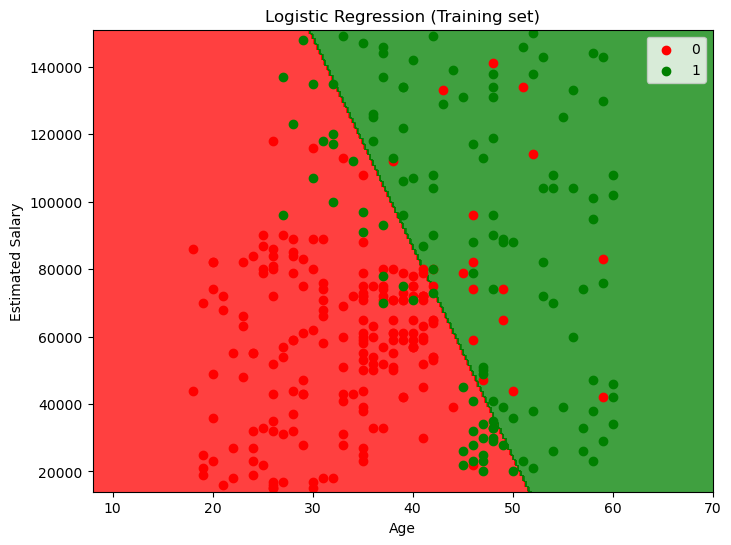

In [42]:
from matplotlib.colors import ListedColormap
# 1. Get the training data (same as original)
X_set, y_set = sc.inverse_transform(x_train), y_train

# 2. Calculate grid parameters that match original visual density but are memory-safe
# Original had step=0.25 for age (very dense) and step=0.25 for salary (extremely dense)
# We'll use linspace to get similar visual quality with controlled memory usage

# Calculate equivalent number of points to match original step size
age_points = int((X_set[:, 0].max() + 10 - (X_set[:, 0].min() - 10)) / 0.25)
salary_points = int((X_set[:, 1].max() + 1000 - (X_set[:, 1].min() - 1000)) / 0.25)

# Cap at reasonable limits to prevent memory errors
max_points = 500  # Adjust based on your system's memory
age_points = min(age_points, max_points)
salary_points = min(salary_points, max_points)

# 3. Create the grid (same range as original but safer implementation)
X1, X2 = np.meshgrid(
    np.linspace(X_set[:, 0].min() - 10, X_set[:, 0].max() + 10, age_points),
    np.linspace(X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000, salary_points)
)

# 4. Predict and plot (same as original but with memory protection)
try:
    # Same prediction logic as original
    Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))
    Z = Z.reshape(X1.shape)
    
    # Create plot with original styling
    plt.figure(figsize=(8, 6))  # Slightly larger than default for better visibility
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    
    # Plot training points with original colors and no edgecolors
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    
    # Original title and labels
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.title('Logistic Regression (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

except MemoryError:
    # Fallback option if even reduced grid is too large
    print("Memory error - using simplified visualization")
    plt.figure(figsize=(8, 6))
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title('Training Data (Decision Boundary Too Memory Intensive)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

C:\Users\Morobang\AppData\Local\Temp\ipykernel_18548\2190604770.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


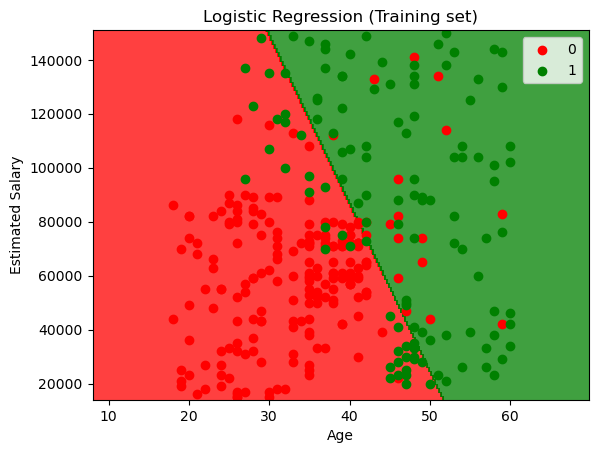

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\Morobang\AppData\Local\Temp\ipykernel_18548\3353773644.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


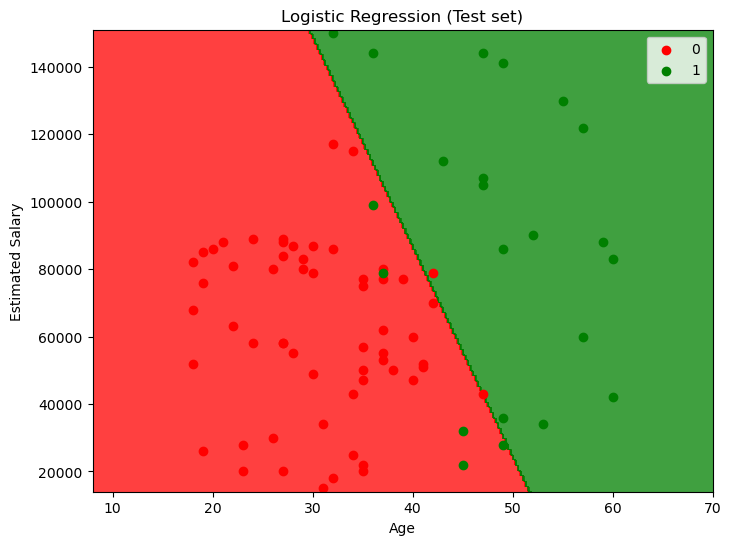

In [44]:
from matplotlib.colors import ListedColormap
# 1. Get the test data
X_set, y_set = sc.inverse_transform(x_test), y_test

# 2. Calculate equivalent grid density with memory protection
# Original had step=0.25 for both axes (extremely dense)
# We'll calculate equivalent point count but cap it

# Calculate how many points the original would generate
age_points = int((X_set[:, 0].max() + 10 - (X_set[:, 0].min() - 10)) / 0.25)
salary_points = int((X_set[:, 1].max() + 1000 - (X_set[:, 1].min() - 1000)) / 0.25)

# Set safe maximum points (adjust based on your system memory)
max_points = 500
age_points = min(age_points, max_points)
salary_points = min(salary_points, max_points)

# 3. Create the grid with identical range but safer method
X1, X2 = np.meshgrid(
    np.linspace(X_set[:, 0].min() - 10, X_set[:, 0].max() + 10, age_points),
    np.linspace(X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000, salary_points)
)

# 4. Predict and plot with original styling
try:
    # Same prediction logic as original
    Z = classifier.predict(sc.transform(np.column_stack((X1.ravel(), X2.ravel()))))
    Z = Z.reshape(X1.shape)
    
    # Create plot with original test set styling
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    
    # Plot test points with original colors
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c=ListedColormap(('red', 'green'))(i), label=j)
    
    # Original axis limits and labels
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

except MemoryError:
    # Fallback visualization if memory is still insufficient
    print("Note: Using simplified visualization due to memory constraints")
    plt.figure(figsize=(8, 6))
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title('Test Set Data (Simplified)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

C:\Users\Morobang\AppData\Local\Temp\ipykernel_18548\486840536.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


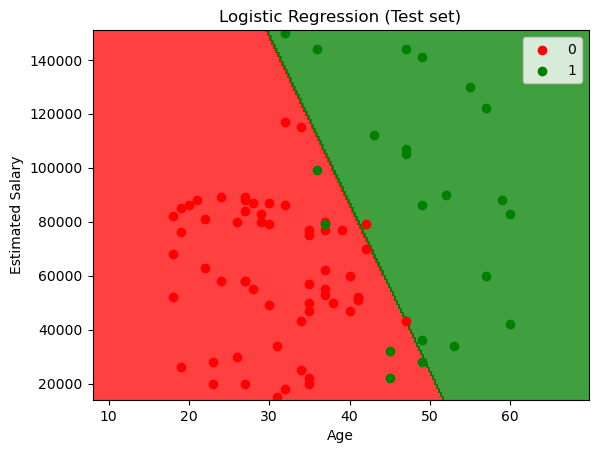

In [45]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

10. Interpret results and next steps 

In [46]:
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
}
for k, v in metrics.items():
    print(f'{k}: {v:.2f}')

# If all metrics are above 0.7, model is generally good.
# If metrics are low, check for class imbalance, feature selection, or try other models.

# Check for class imbalance
print('Class distribution:', np.bincount(y_test))

# Show coefficients for interpretation
print('Feature coefficients:', classifier.coef_)
print('Intercept:', classifier.intercept_)

Accuracy: 0.93
Precision: 0.94
Recall: 0.77
F1-score: 0.85
ROC-AUC: 0.98
Class distribution: [58 22]
Feature coefficients: [[2.00319272 1.08067231]]
Intercept: [-0.87067834]
